In [185]:
import pandas as pd
import json
import re

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
df_c = pd.read_excel("../sample/mobile-app-clickstream_sample.xlsx")
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   userId      39 non-null     object        
 1   eventId     39 non-null     object        
 2   eventTime   39 non-null     datetime64[ns]
 3   eventType   39 non-null     object        
 4   attributes  13 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.6+ KB


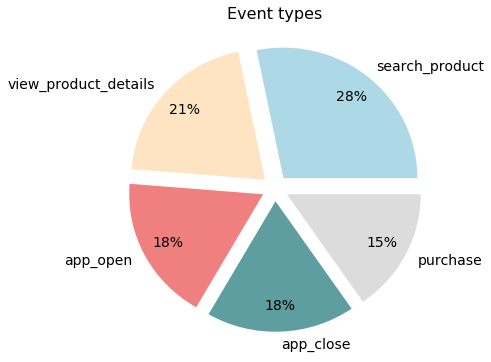

In [188]:
event_type_grouped = df_c.eventType.value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%'.format(p=pct)
    return my_autopct

plt.figure(figsize=(6,6))

plt.pie(event_type_grouped,\
        labels=event_type_grouped.keys(),\
        colors=['lightblue','bisque','lightcoral','cadetblue', 'gainsboro'],\
        autopct=make_autopct(event_type_grouped.values),\
        pctdistance=0.8,\
        explode = [0.1]*len(event_type_grouped),\
        textprops={'fontsize':14})

plt.title('Event types',fontsize=16)

plt.show()

In [183]:
def get_purchase_id(line):
    result = ""
    
    if not pd.isna(line):
        # replace double '{}' characters and "“"
        line = re.sub("^{{", "{", line)
        line = re.sub("}}$", "}", line)
        line = re.sub("“", "\"", line)

        parsed = json.loads(line)

        if "purchase_id" in parsed:
            result = parsed["purchase_id"]

    return result

In [184]:
df_c["purchaseId"] = df_c.attributes.apply(get_purchase_id)

df_c.head(7)

,userId,eventId,eventTime,eventType,attributes,purchaseId
0,u1,u1_e1,2019-01-01 00:00:00,app_open,"{{""campaign_id"": ""cmp1"", ""channel_id"": ""Googl...",
1,u1,u1_e2,2019-01-01 00:00:05,search_product,NaN,
2,u1,u1_e3,2019-01-01 00:00:10,search_product,NaN,
3,u1,u1_e4,2019-01-01 00:00:15,search_product,NaN,
4,u1,u1_e5,2019-01-01 00:00:20,view_product_details,NaN,
5,u1,u1_e6,2019-01-01 00:01:00,purchase,"{{""purchase_id"": ""p1""}}",p1
6,u1,u1_e7,2019-01-01 00:02:00,app_close,NaN,


In [171]:
df_p = pd.read_excel("../sample/purchases_sample.xlsx")
df_p = df_p.astype({"purchaseId":"str"})
df_p.shape

(6, 4)

In [172]:
df_p.head(6)

,purchaseId,purchaseTime,billingCost,isConfirmed
0,p1,2019-01-01 00:01:05,100.5,True
1,p2,2019-01-01 00:03:10,200.0,True
2,p3,2019-01-01 01:12:15,300.0,False
3,p4,2019-01-01 02:13:05,50.2,True
4,p5,2019-01-01 02:15:05,75.0,True
5,p6,2019-01-02 13:03:00,99.0,False


In [189]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   purchaseId    6 non-null      object        
 1   purchaseTime  6 non-null      datetime64[ns]
 2   billingCost   6 non-null      float64       
 3   isConfirmed   6 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(1)
memory usage: 278.0+ bytes
